In [ ]:
import zipfile
import pandas as pd

with zipfile.ZipFile('ml-latest-small.zip', 'r') as zip_ref:
    zip_ref.extractall('ml-latest-small')




FileNotFoundError: [Errno 2] No such file or directory: 'ml-latest-small/ratings.csv'

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv('ml-latest-small/ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/ml-latest-small/movies.csv')
links = pd.read_csv('ml-latest-small/ml-latest-small/links.csv')
tags = pd.read_csv('ml-latest-small/ml-latest-small/tags.csv')

In [19]:
import pandas as pd
import os
import glob

def load_data_from_directory(dir_path: str) -> dict:
    """
    Automatically finds all CSV files in a given directory, loads them into
    pandas DataFrames, and returns them in a dictionary.

    The dictionary keys are derived from the filenames (without the .csv extension).

    Args:
        dir_path (str): The path to the directory containing the CSV files.

    Returns:
        dict: A dictionary where keys are filenames and values are the
              corresponding pandas DataFrames. Returns an empty dictionary if
              the path is invalid or no CSV files are found.
    """
    print(f"Attempting to load all CSV files from: {dir_path}")
    
    # Check if the directory exists
    if not os.path.isdir(dir_path):
        print(f"Error: Directory not found at path: {dir_path}")
        return {}

    # Find all files ending with .csv
    csv_files = glob.glob(os.path.join(dir_path, '*.csv'))

    if not csv_files:
        print(f"Warning: No CSV files found in directory: {dir_path}")
        return {}

    # Create a dictionary to hold the dataframes
    dataframes = {}
    for file_path in csv_files:
        file_name = os.path.basename(file_path)
        df_name = os.path.splitext(file_name)[0]
        
        try:
            print(f"  -> Loading '{file_name}'...")
            dataframes[df_name] = pd.read_csv(file_path)
        except Exception as e:
            print(f"Error loading {file_name}: {e}")
            continue 
    
    print(f"Successfully loaded {len(dataframes)} DataFrame(s): {list(dataframes.keys())}")
    return dataframes

In [61]:
class GraphPlotter:
    """
    A reusable class for creating common plots with matplotlib and seaborn.
    
    Initialize the plotter with a pandas DataFrame. Then, call its methods
    to generate plots for specific columns.
    """
    
    def __init__(self, dataframe: pd.DataFrame):
        """
        Initializes the GraphPlotter with a dataframe.
        
        Args:
            dataframe (pd.DataFrame): The dataframe to be used for all plots.
        """
        if not isinstance(dataframe, pd.DataFrame):
            raise TypeError("Input must be a pandas DataFrame.")
        self.df = dataframe
        sns.set_style('whitegrid')
        plt.style.use('fivethirtyeight')
    
    def plot_boxplot(self, x_col: str, y_col: str = None, title: str = None, figsize: tuple = (12, 7)):
        """
        Generates a box plot. Can be used for a single numerical column 
        or a numerical column grouped by a categorical column.

        Args:
            x_col (str): The name of the column for the x-axis (categorical) 
                         or the numerical column if y_col is None.
            y_col (str, optional): The name of the column for the y-axis (numerical). 
                                   If None, x_col is treated as the numerical column. 
                                   Defaults to None.
            title (str, optional): The title of the plot. Defaults to a generated title.
            figsize (tuple, optional): The size of the figure. Defaults to (12, 7).
        """
        plt.figure(figsize=figsize)
        
        if y_col:
            # Box plot of a numerical column grouped by a categorical column
            sns.boxplot(data=self.df, x=x_col, y=y_col, palette='coolwarm')
            plot_title = title if title else f'Box Plot of {y_col} by {x_col}'
            plt.xlabel(x_col, fontsize=14)
            plt.ylabel(y_col, fontsize=14)
            plt.xticks(rotation=45, ha='right')
        else:
            # Box plot of a single numerical column
            sns.boxplot(data=self.df, x=x_col, palette='coolwarm')
            plot_title = title if title else f'Box Plot of {x_col}'
            plt.xlabel(x_col, fontsize=14)
        
        plt.title(plot_title, fontsize=18)
        plt.tight_layout()
        plt.show()

    def plot_violinplot(self, x_col: str, y_col: str = None, title: str = None, figsize: tuple = (12, 7)):
        """
        Generates a violin plot. Combines a box plot with a KDE plot.
        Can be used for a single numerical column or a numerical column 
        grouped by a categorical column.

        Args:
            x_col (str): The name of the column for the x-axis (categorical) 
                         or the numerical column if y_col is None.
            y_col (str, optional): The name of the column for the y-axis (numerical). 
                                   If None, x_col is treated as the numerical column. 
                                   Defaults to None.
            title (str, optional): The title of the plot. Defaults to a generated title.
            figsize (tuple, optional): The size of the figure. Defaults to (12, 7).
        """
        plt.figure(figsize=figsize)
        
        if y_col:
            # Violin plot of a numerical column grouped by a categorical column
            sns.violinplot(data=self.df, x=x_col, y=y_col, palette='icefire', inner='quartile')
            plot_title = title if title else f'Violin Plot of {y_col} by {x_col}'
            plt.xlabel(x_col, fontsize=14)
            plt.ylabel(y_col, fontsize=14)
            plt.xticks(rotation=45, ha='right')
        else:
            # Violin plot of a single numerical column
            sns.violinplot(data=self.df, x=x_col, palette='icefire', inner='quartile')
            plot_title = title if title else f'Violin Plot of {x_col}'
            plt.xlabel(x_col, fontsize=14)
        
        plt.title(plot_title, fontsize=18)
        plt.tight_layout()
        plt.show()

    def plot_countplot(self, col: str, title: str = None, figsize: tuple = (12, 7), palette: str = 'viridis'):
        """
        Generates a count plot for a single categorical column.

        Args:
            col (str): The name of the column to plot.
            title (str, optional): The title of the plot. Defaults to a generated title.
            figsize (tuple, optional): The size of the figure. Defaults to (12, 7).
            palette (str, optional): The color palette to use. Defaults to 'viridis'.
        """
        plt.figure(figsize=figsize)
        sns.countplot(data=self.df, x=col, palette=palette,hue=col,legend=False)
        plot_title = title if title else f'Distribution of {col}'
        plt.title(plot_title, fontsize=18)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
    def plot_piechart(self, col: str, title: str = None, figsize: tuple = (8, 8)):
        """
        Generates a pie chart for a single categorical column.

        Args:
            col (str): The name of the column to plot.
            title (str, optional): The title of the plot. Defaults to a generated title.
            figsize (tuple, optional): The size of the figure. Defaults to (8, 8).
        """
        plt.figure(figsize=figsize)
        counts = self.df[col].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
        
        centre_circle = plt.Circle((0,0),0.70,fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)
        
        plot_title = title if title else f'Proportion of {col}'
        plt.title(plot_title, fontsize=18)
        plt.tight_layout()
        plt.show()

    def plot_histogram(self, col: str, bins: int = 30, title: str = None, figsize: tuple = (12, 7)):
        """
        Generates a histogram for a single numerical column.

        Args:
            col (str): The name of the column to plot.
            bins (int, optional): The number of bins for the histogram. Defaults to 30.
            title (str, optional): The title of the plot. Defaults to a generated title.
            figsize (tuple, optional): The size of the figure. Defaults to (12, 7).
        """
        plt.figure(figsize=figsize)
        sns.histplot(self.df[col], bins=bins, kde=True, line_kws={'linewidth': 3})
        
        plot_title = title if title else f'Histogram of {col}'
        plt.title(plot_title, fontsize=18)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.tight_layout()
        plt.show()
        
    def plot_kde(self, col: str, title: str = None, figsize: tuple = (12, 7)):
        """
        Generates a Kernel Density Estimate (KDE) plot for a single numerical column.

        Args:
            col (str): The name of the column to plot.
            title (str, optional): The title of the plot. Defaults to a generated title.
            figsize (tuple, optional): The size of the figure. Defaults to (12, 7).
        """
        plt.figure(figsize=figsize)
        sns.kdeplot(self.df[col], fill=True, lw=3)
        
        plot_title = title if title else f'KDE Plot of {col}'
        plt.title(plot_title, fontsize=18)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Density', fontsize=14)
        plt.tight_layout()
        plt.show()

    def plot_scatterplot(self, x_col: str, y_col: str, hue_col: str = None, title: str = None, figsize: tuple = (12, 7)):
        """
        Generates a scatter plot for two numerical columns.

        Args:
            x_col (str): The name of the column for the x-axis.
            y_col (str): The name of the column for the y-axis.
            hue_col (str, optional): A column to use for color encoding points. Defaults to None.
            title (str, optional): The title of the plot. Defaults to a generated title.
            figsize (tuple, optional): The size of the figure. Defaults to (12, 7).
        """
        plt.figure(figsize=figsize)
        sns.scatterplot(data=self.df, x=x_col, y=y_col, hue=hue_col, palette='deep')
        
        plot_title = title if title else f'Scatter Plot of {y_col} vs. {x_col}'
        plt.title(plot_title, fontsize=18)
        plt.xlabel(x_col, fontsize=14)
        plt.ylabel(y_col, fontsize=14)
        plt.tight_layout()
        plt.show()

    def plot_barplot(self, x_col: str, y_col: str, title: str = None, figsize: tuple = (12, 7), palette: str = 'viridis'):
        """
        Generates a bar plot for a categorical column against a numerical column.

        Args:
            x_col (str): The name of the column for the x-axis (categorical).
            y_col (str): The name of the column for the y-axis (numerical).
            title (str, optional): The title of the plot. Defaults to a generated title.
            figsize (tuple, optional): The size of the figure. Defaults to (12, 7).
            palette (str, optional): The color palette to use. Defaults to 'viridis'.
        """
        plt.figure(figsize=figsize)
        sns.barplot(data=self.df, x=x_col, y=y_col, palette=palette)
        
        plot_title = title if title else f'Bar Plot of {y_col} by {x_col}'
        plt.title(plot_title, fontsize=18)
        plt.xlabel(x_col, fontsize=14)
        plt.ylabel(y_col, fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

In [47]:
def gen_summary(df: pd.DataFrame) -> str:
    """
    Generates a summary of the DataFrame including its shape, data types, 
    and basic statistics.

    Args:
        df (pd.DataFrame): The DataFrame to summarize.

    Returns:
        str: A formatted string containing the summary.
    """
    summary = []
    summary.append(f"DataFrame Shape: {df.shape}")
    summary.append(f"Data Types:\n{df.dtypes}")
    summary.append(f"Missing Values:\n{df.isnull().sum()}")
    summary.append(f"Statistical Summary:\n{df.describe()}")
    summary.append(f"First 5 Rows:\n{df.head()}")
    summary.append(f"Last 5 Rows:\n{df.tail()}")
    summary.append(f"Columns: {list(df.columns)}")
    summary.append(f"Index: {df.index}")
    summary.append(f"Memory Usage: {df.info()}")
    
    return "\n".join(summary)

In [22]:
df_list = load_data_from_directory('ml-latest-small/ml-latest-small')
ratings = df_list.get('ratings', pd.DataFrame())
movies = df_list.get('movies', pd.DataFrame())  
links = df_list.get('links', pd.DataFrame())
tags = df_list.get('tags', pd.DataFrame())

Attempting to load all CSV files from: ml-latest-small/ml-latest-small
  -> Loading 'links.csv'...
  -> Loading 'movies.csv'...
  -> Loading 'ratings.csv'...
  -> Loading 'tags.csv'...
Successfully loaded 4 DataFrame(s): ['links', 'movies', 'ratings', 'tags']


In [49]:
print(gen_summary(ratings))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
DataFrame Shape: (100836, 4)
Data Types:
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
Missing Values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Statistical Summary:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000

In [50]:
print(gen_summary(movies))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
DataFrame Shape: (9742, 3)
Data Types:
movieId     int64
title      object
genres     object
dtype: object
Missing Values:
movieId    0
title      0
genres     0
dtype: int64
Statistical Summary:
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000
First 5 Rows:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4       

In [51]:
print(gen_summary(tags))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
DataFrame Shape: (3683, 4)
Data Types:
userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object
Missing Values:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
Statistical Summary:
            userId        movieId     timestamp
count  3683.000000    3683.000000  3.683000e+03
mean    431.149335   27252.013576  1.320032e+09
std     158.472553   43490.558803  1.721025e+08
min       2.000000       1.000000  1.137179e+09
25%     424.000000    1262.500000  1.137521e+09
50%     474.000000    4454.000000  1.269833e+09
75%     477.000000   39263.00

In [52]:
print(gen_summary(links))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
DataFrame Shape: (9742, 3)
Data Types:
movieId      int64
imdbId       int64
tmdbId     float64
dtype: object
Missing Values:
movieId    0
imdbId     0
tmdbId     8
dtype: int64
Statistical Summary:
             movieId        imdbId         tmdbId
count    9742.000000  9.742000e+03    9734.000000
mean    42200.353623  6.771839e+05   55162.123793
std     52160.494854  1.107228e+06   93653.481487
min         1.000000  4.170000e+02       2.000000
25%      3248.250000  9.518075e+04    9665.500000
50%      7300.000000  1.672605e+05   16529.000000
75%     76232.000000  8.055685e+05   44205.750000
max    193609.000000  8.391976e+06  525662.000000
Fir

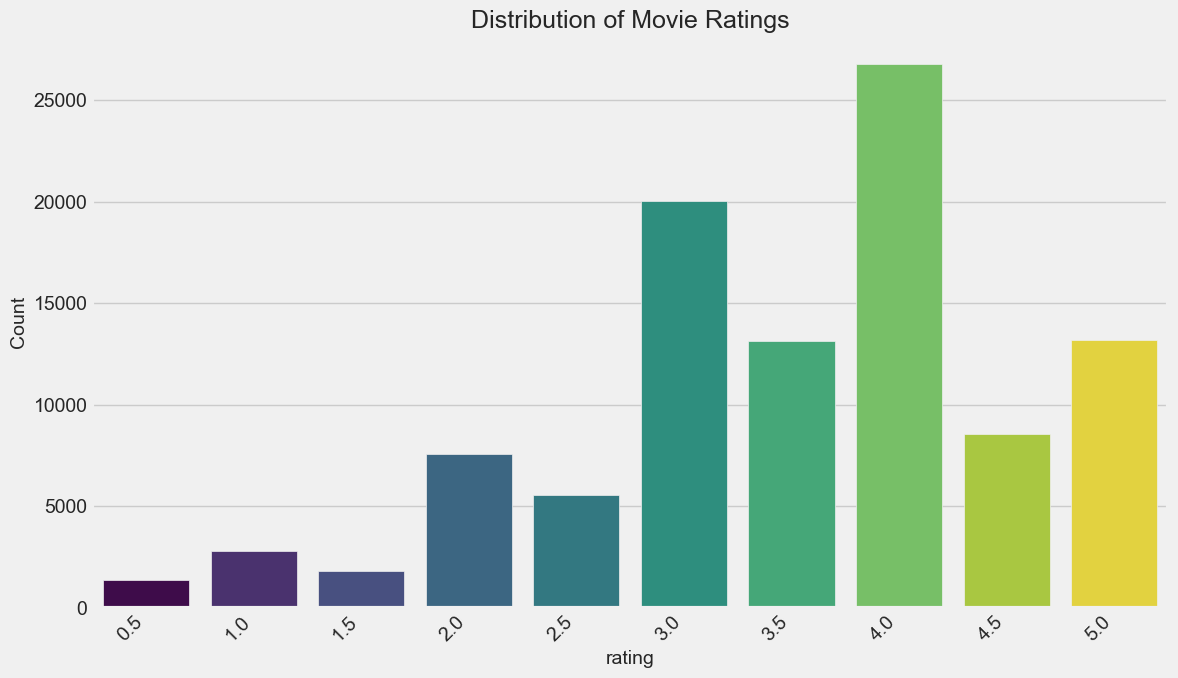

In [ ]:
#count plot for the distribution of movie ratings
movie_rating_plotter = GraphPlotter(ratings)
movie_rating_plotter.plot_countplot('rating', title='Distribution of Movie Ratings')

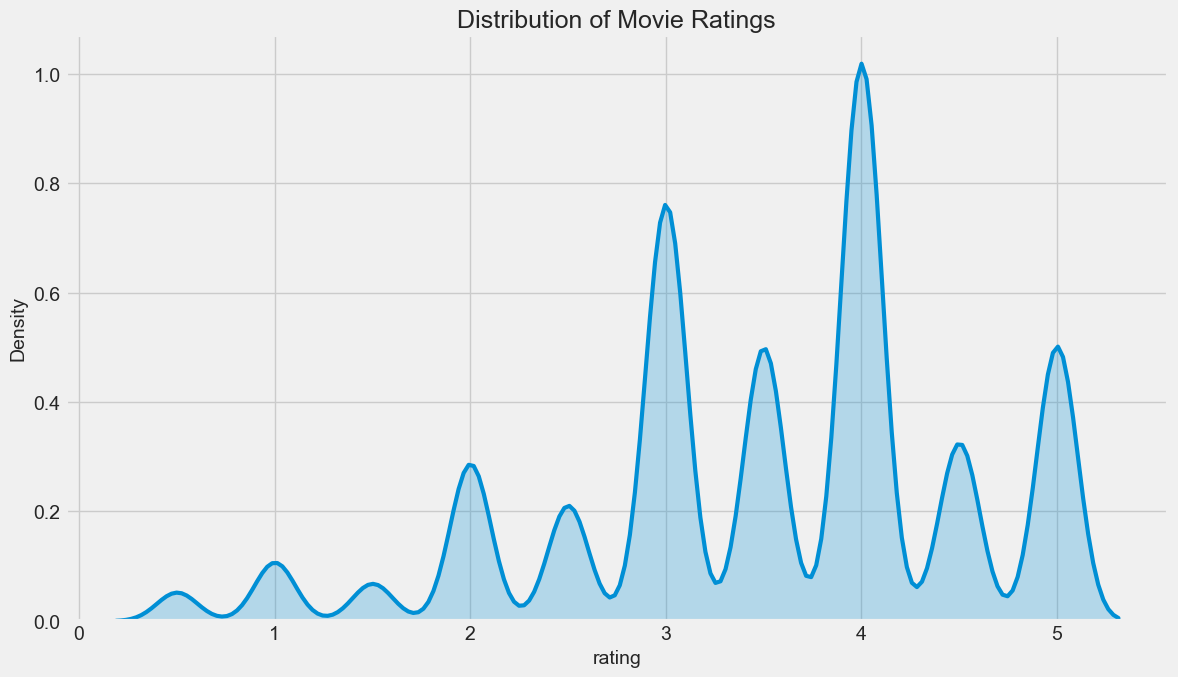

In [ ]:
#kde plot for the distribution of movie ratings
movie_rating_plotter.plot_kde('rating', title='Distribution of Movie Ratings')

C:\Users\pking\AppData\Local\Temp\ipykernel_17636\3971404317.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=self.df, x=x_col, palette='icefire', inner='quartile')


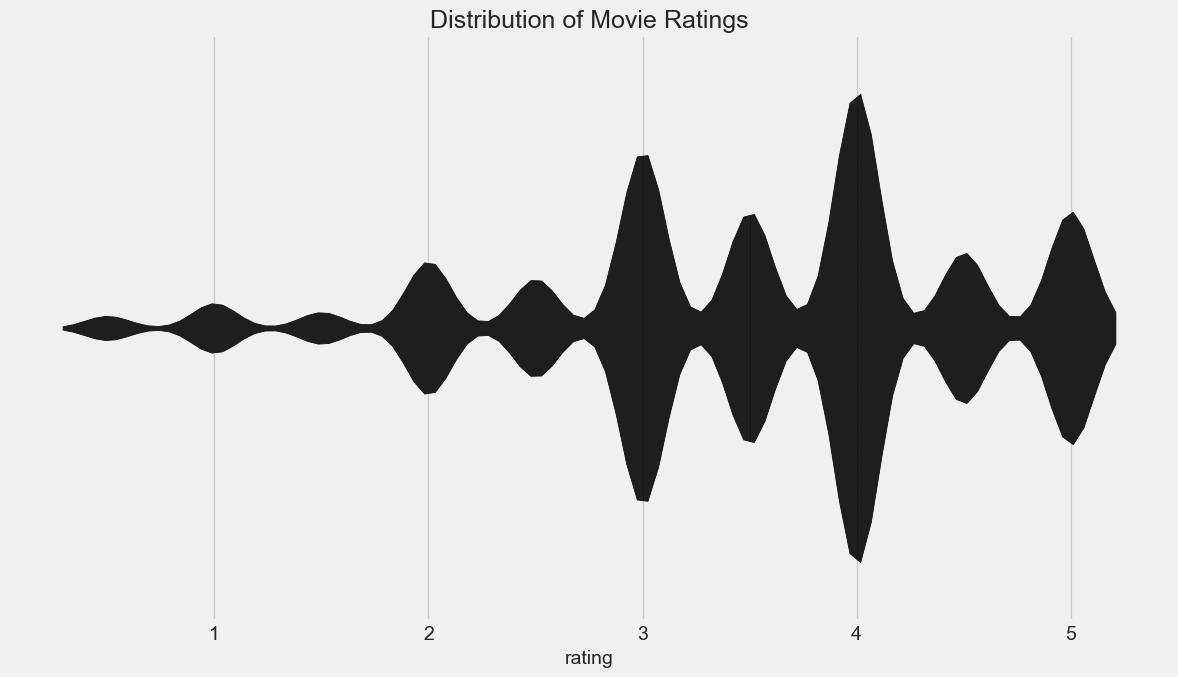

In [ ]:
#violin plot for the distribution of movie ratings
movie_rating_plotter.plot_violinplot('rating', title='Distribution of Movie Ratings')

<p>
We can confirm that user has a prefernce for whole star review rath than half star review.<br/>
And we also obser that there is a tendency for a user to give positive review which might be due to that user watch only those movies that they like, for the negative review we are not having a lot data <br/>
The distribution is left skewed 
</p>

In [183]:
#merge both the moveis and ratings dataframes on movieId
# This will create a master DataFrame that contains both movie details and their ratings
master_df = pd.merge(ratings, movies, on='movieId',how='inner')


In [184]:
print(gen_summary(master_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB
DataFrame Shape: (100836, 6)
Data Types:
userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
dtype: object
Missing Values:
userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64
Statistical Summary:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.50155

In [ ]:
plotter = GraphPlotter(master_df)

In [54]:
# Dataframe with ration count and average rating for each movie
movie_stats = master_df.groupby('title').agg(
    rating_count=('rating', 'count'),
    rating_avg=('rating', 'mean')
).reset_index()

In [62]:
# Initialize a new plotter for this aggregated dataframe
stats_plotter = GraphPlotter(movie_stats)

print("DataFrame with Movie Statistics (Top 5):")
print(movie_stats.sort_values(['rating_avg', 'rating_count'], ascending=[False, False]).head())

DataFrame with Movie Statistics (Top 5):
                                                  title  rating_count  \
954                                 Belle époque (1992)             2   
1902                 Come and See (Idi i smotri) (1985)             2   
2758                              Enter the Void (2009)             2   
3861               Heidi Fleiss: Hollywood Madam (1995)             2   
4612  Jonah Who Will Be 25 in the Year 2000 (Jonas q...             2   

      rating_avg  
954          5.0  
1902         5.0  
2758         5.0  
3861         5.0  
4612         5.0  


In [63]:
# Get the top 10 most rated movies
top_10_popular = movie_stats.sort_values('rating_count', ascending=False).head(10)

print("\n--- Top 10 Most Popular Movies (By Number of Ratings) ---")
print(top_10_popular)


--- Top 10 Most Popular Movies (By Number of Ratings) ---
                                          title  rating_count  rating_avg
3158                        Forrest Gump (1994)           329    4.164134
7593           Shawshank Redemption, The (1994)           317    4.429022
6865                        Pulp Fiction (1994)           307    4.197068
7680           Silence of the Lambs, The (1991)           279    4.161290
5512                         Matrix, The (1999)           278    4.192446
8001  Star Wars: Episode IV - A New Hope (1977)           251    4.231076
4662                       Jurassic Park (1993)           238    3.750000
1337                          Braveheart (1995)           237    4.031646
8363          Terminator 2: Judgment Day (1991)           224    3.970982
7421                    Schindler's List (1993)           220    4.225000


C:\Users\pking\AppData\Local\Temp\ipykernel_17636\3134091686.py:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=self.df, x=x_col, y=y_col, palette=palette)


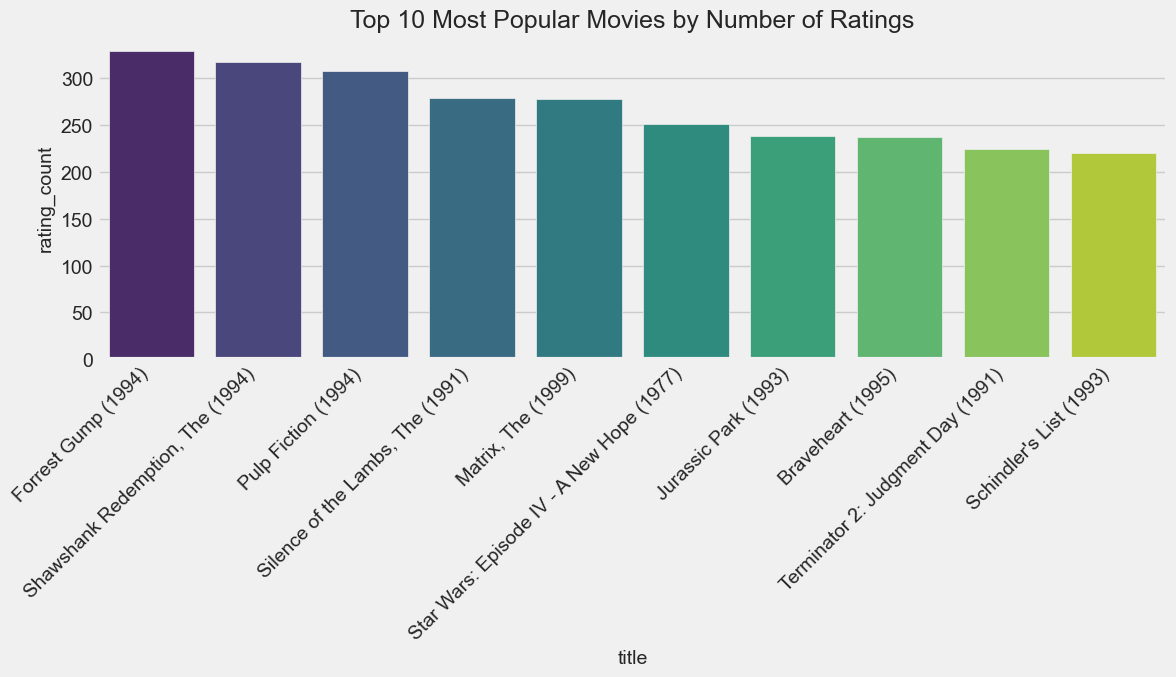

In [ ]:
#plot the top 10 most popular movies by number of ratings
top10_plotter = GraphPlotter(top_10_popular)
top10_plotter.plot_barplot('title', 'rating_count', title='Top 10 Most Popular Movies by Number of Ratings')

In [65]:
# Naive approach: Sort by average rating
highest_rated_naive = movie_stats.sort_values('rating_avg', ascending=False).head(10)

print("\n--- Top 10 Highest Rated Movies (Naive Approach) ---")
print(highest_rated_naive)


--- Top 10 Highest Rated Movies (Naive Approach) ---
                                                  title  rating_count  \
4699                             Karlson Returns (1970)             1   
9685                   Zeitgeist: Moving Forward (2011)             1   
2578  Dream of Light (a.k.a. Quince Tree Sun, The) (...             1   
2571             Dragons: Gift of the Night Fury (2011)             1   
35                                  12 Angry Men (1997)             1   
4681                       Justice League: Doom (2012)              1   
4658                          Junior and Karlson (1968)             1   
4647                                    Jump In! (2007)             1   
4122  Human Condition III, The (Ningen no joken III)...             1   
5239               Louis Theroux: Law & Disorder (2008)             1   

      rating_avg  
4699         5.0  
9685         5.0  
2578         5.0  
2571         5.0  
35           5.0  
4681         5.0  
4658     

## bad thing is that only 1 person has given rating and this may introduce personal bias to data so we should not select such movies and select a threshold for rating_count and then find the top 10 most avg rated movies


Minimum ratings threshold (90th percentile): 27 ratings

--- Top 10 Highest Rated Movies (with sufficient ratings) ---
                                                  title  rating_count  \
7593                   Shawshank Redemption, The (1994)           317   
8163      Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)            27   
6602                     Philadelphia Story, The (1940)            29   
4972                          Lawrence of Arabia (1962)            45   
4018                                 Hoop Dreams (1994)            29   
3499                              Godfather, The (1972)           192   
3011                                  Fight Club (1999)           218   
1961                              Cool Hand Luke (1967)            57   
2531  Dr. Strangelove or: How I Learned to Stop Worr...            97   
6999                                 Rear Window (1954)            84   

      rating_avg  
7593    4.429022  
8163    4.333333  
6602    4.310345  


C:\Users\pking\AppData\Local\Temp\ipykernel_17636\3134091686.py:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=self.df, x=x_col, y=y_col, palette=palette)


<Figure size 1200x800 with 0 Axes>

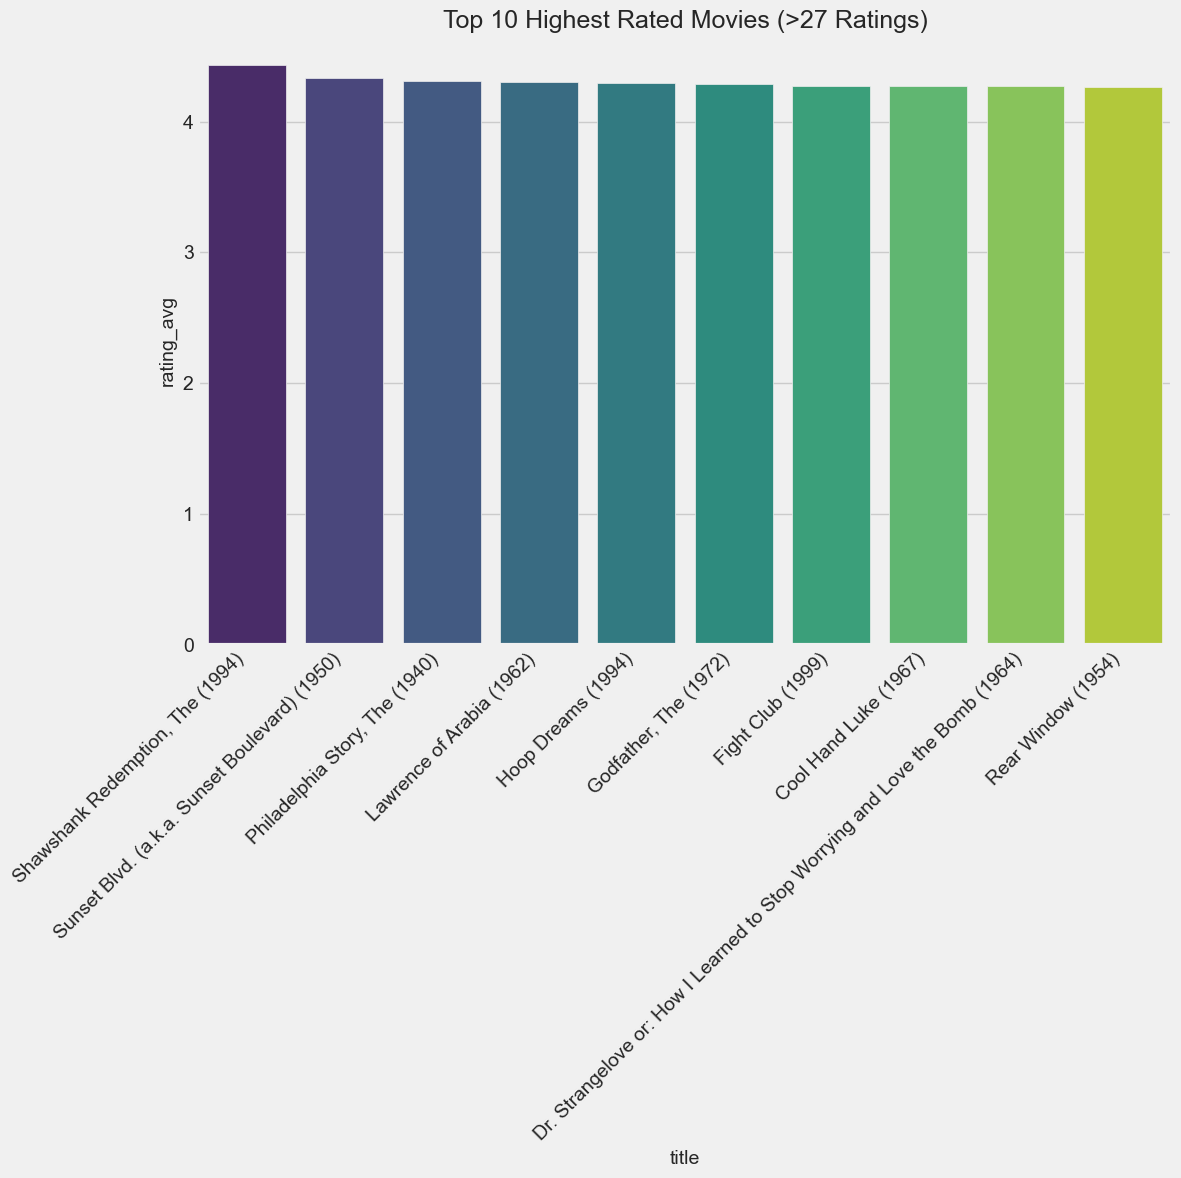

In [68]:
# Calculate the 90th percentile for rating count
min_ratings_threshold = movie_stats['rating_count'].quantile(0.90)
print(f"\nMinimum ratings threshold (90th percentile): {int(min_ratings_threshold)} ratings")

# FFiltering the movies based on the threshold
qualified_movies = movie_stats[movie_stats['rating_count'] >= min_ratings_threshold]

# Sorting based on the avg rating descending
top_10_best = qualified_movies.sort_values('rating_avg', ascending=False).head(10)

print("\n--- Top 10 Highest Rated Movies (with sufficient ratings) ---")
print(top_10_best)

#plot the top 10 highest rated movies with sufficient ratings
plt.figure(figsize=(12, 8))
top_10_best_plotter = GraphPlotter(top_10_best)
top_10_best_plotter.plot_barplot('title', 'rating_avg', title=f'Top 10 Highest Rated Movies (>{int(min_ratings_threshold)} Ratings)',figsize=(12,12))

C:\Users\pking\AppData\Local\Temp\ipykernel_17636\3134091686.py:182: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=self.df, x=x_col, y=y_col, hue=hue_col, palette='deep')


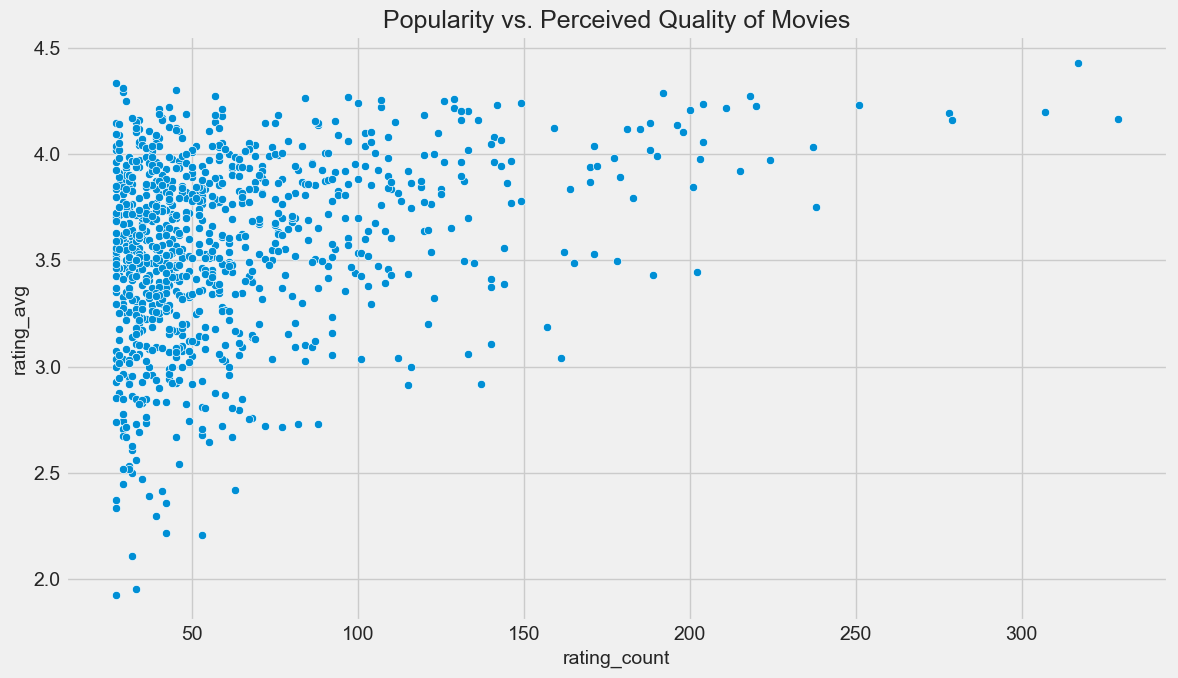

In [ ]:
# For observing the relationship between popularity and perceived quality
qualified_plotter = GraphPlotter(qualified_movies)

qualified_plotter.plot_scatterplot(
    x_col='rating_count',
    y_col='rating_avg',
    title='Popularity vs. Perceived Quality of Movies'
)


We can observe from here:
</br>
<li>Lower the number of ratings lower the confidence for rating 
<li> But as the Count of ratings increase we have confidence for our rating or we can say the rang of ratings has shrinked as we move towards right 
<li> It also confirms that as the rating_count increases then the average score stabilizes and becomes much more reliable.
Which is fine as we can infer that wisdom of the crowd will take place here 
<li> For us the threshold is a hyperparameter, i guess we should play around it and I think later on we can try for a 95 or 99 percentile threshold but the downside i see is that first obviously it will reduce the quealified movie size but the second would be that it will also reduce diversity and we will be left with only those movies whose ratings are very high and we may not be able to personalize the recommendation

In [ ]:
# Finding all unique genres in the dataset
all_genres = set()
master_df['genres'].str.split('|').apply(all_genres.update)
print(sorted(all_genres))

['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [94]:
# Create the exploded genre dataframe for this analysis
genre_ratings_df = master_df.copy()
genre_ratings_df['genre'] = genre_ratings_df['genres'].str.split('|')
genre_ratings_df = genre_ratings_df.explode('genre')
genre_ratings_df = genre_ratings_df[genre_ratings_df['genre'] != '(no genres listed)']
print(gen_summary(genre_ratings_df))

<class 'pandas.core.frame.DataFrame'>
Index: 274433 entries, 0 to 100835
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     274433 non-null  int64  
 1   movieId    274433 non-null  int64  
 2   rating     274433 non-null  float64
 3   timestamp  274433 non-null  int64  
 4   title      274433 non-null  object 
 5   genres     274433 non-null  object 
 6   genre      274433 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 16.8+ MB
DataFrame Shape: (274433, 7)
Data Types:
userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
genre         object
dtype: object
Missing Values:
userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
genre        0
dtype: int64
Statistical Summary:
              userId        movieId         rating     timestamp
count  274433.000000  274433.000000  2744

In [87]:
# Top 10 genres
top_10_genres = genre_ratings_df['genre'].value_counts().nlargest(10).index
top_genres_df = genre_ratings_df[genre_ratings_df['genre'].isin(top_10_genres)]

In [206]:
top_genres_df.head(10)

,userId,movieId,rating,timestamp,title,genres,genre
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Children
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Comedy
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,Comedy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,Action
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,Crime
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,Thriller


C:\Users\pking\AppData\Local\Temp\ipykernel_17636\3134091686.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=self.df, x=x_col, y=y_col, palette='icefire', inner='quartile')


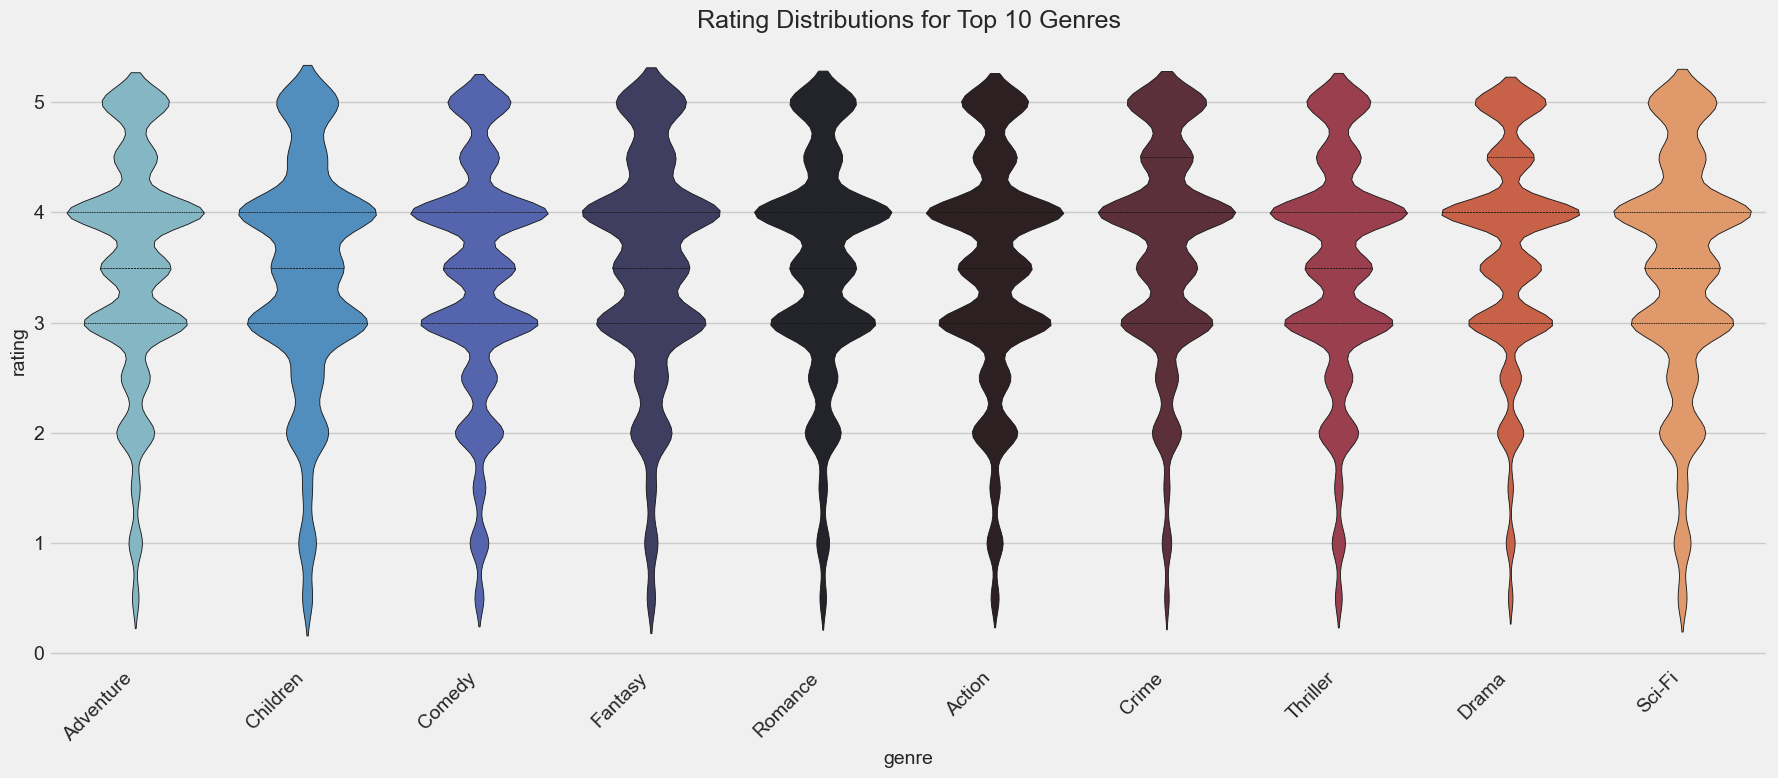

In [89]:
# Plotting the distribution of ratings for the top 10 genres
top_genre_plotter = GraphPlotter(top_genres_df)
top_genre_plotter.plot_violinplot(
    x_col='genre',
    y_col='rating',
    title='Rating Distributions for Top 10 Genres',
    figsize=(18, 8)
)

In [95]:
# Get the 10 least common genres
least_popular_genres = genre_ratings_df['genre'].value_counts().nsmallest(10).index

print("--- 10 Least Popular (Most Niche) Genres ---")
print(least_popular_genres)

--- 10 Least Popular (Most Niche) Genres ---
Index(['Film-Noir', 'Documentary', 'Western', 'Musical', 'IMAX', 'War',
       'Animation', 'Horror', 'Mystery', 'Children'],
      dtype='object', name='genre')


C:\Users\pking\AppData\Local\Temp\ipykernel_17636\3134091686.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=self.df, x=x_col, y=y_col, palette='icefire', inner='quartile')


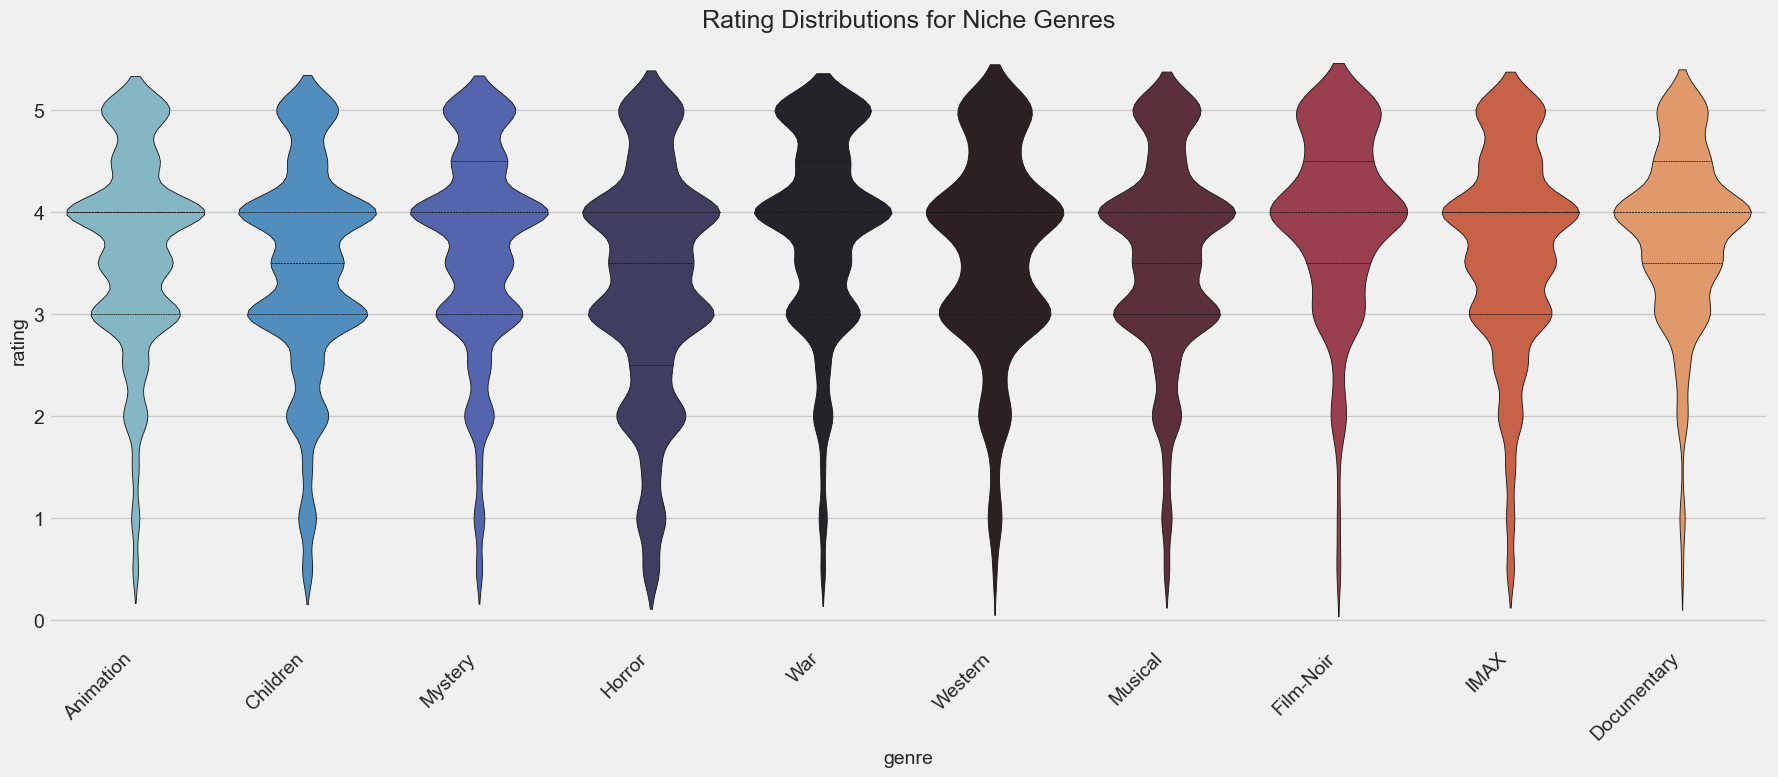

In [207]:
# Filter the dataframe to only include these niche genres
niche_genres_df = genre_ratings_df[genre_ratings_df['genre'].isin(least_popular_genres)]

# Initialize a plotter for this new dataframe
niche_genre_plotter = GraphPlotter(niche_genres_df)

# Create the violin plot
niche_genre_plotter.plot_violinplot(
    x_col='genre',
    y_col='rating',
    title='Rating Distributions for Niche Genres',
    figsize=(18, 8)
)

In [97]:
# First, calculate the stats for each genre
genre_stats = genre_ratings_df.groupby('genre').agg(
    rating_count=('rating', 'count'),
    rating_avg=('rating', 'mean')
).reset_index()

# Set a reasonable threshold. Let's use the 50th percentile (the median).
# This means we only consider genres that are at least as popular as the median genre.
min_ratings_threshold = genre_stats['rating_count'].quantile(0.50)

print(f"Minimum rating count threshold for genres: {int(min_ratings_threshold)}")

# Filter for genres that meet the threshold
qualified_genres = genre_stats[genre_stats['rating_count'] >= min_ratings_threshold]

# Now, find the 5 lowest-rated genres from this qualified list
lowest_rated_genres = qualified_genres.sort_values('rating_avg', ascending=True).head(5)

print("\n--- 5 Lowest-Rated Genres (with sufficient ratings) ---")
print(lowest_rated_genres)

Minimum rating count threshold for genres: 9208

--- 5 Lowest-Rated Genres (with sufficient ratings) ---
       genre  rating_count  rating_avg
4     Comedy         39053    3.384721
3   Children          9208    3.412956
0     Action         30635    3.447984
15    Sci-Fi         17243    3.455721
8    Fantasy         11834    3.491001


C:\Users\pking\AppData\Local\Temp\ipykernel_17636\3134091686.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=self.df, x=x_col, y=y_col, palette='icefire', inner='quartile')


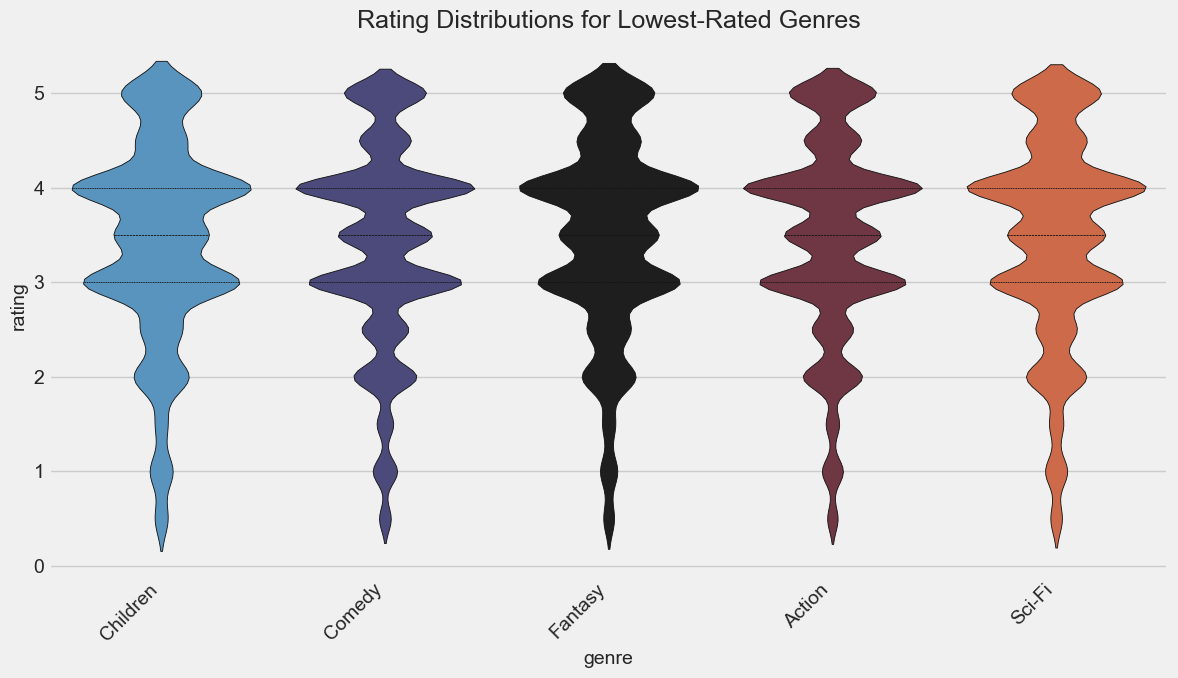

In [98]:
# Get the names of the lowest-rated genres
lowest_rated_genre_names = lowest_rated_genres['genre'].tolist()

# Filter the main genre dataframe
lowest_rated_df = genre_ratings_df[genre_ratings_df['genre'].isin(lowest_rated_genre_names)]

# Initialize plotter
lowest_rated_plotter = GraphPlotter(lowest_rated_df)

# Create the violin plot
lowest_rated_plotter.plot_violinplot(
    x_col='genre',
    y_col='rating',
    title='Rating Distributions for Lowest-Rated Genres'
)

<li>The "Lowest-Rated" genres are actually the "Mainstream" genres. They are the most accessible and widely-watched films. Because they try to appeal to everyone, they inevitably get a huge volume of "average" (3-star) ratings and are more likely to be disliked by some portion of the audience. Their average rating is pulled down by their sheer popularity.
<li>The "Niche" genres are the "Specialty" or "Critics' Choice" genres. They have a smaller, more self-selecting audience. People who seek out a Documentary or a Film-Noir movie generally know what they are getting into and are more likely to enjoy it, leading to higher and more consistent ratings.

In [185]:
master_df['rating_datetime'] = pd.to_datetime(master_df['timestamp'], unit='s')
master_df.head()

,userId,movieId,rating,timestamp,title,genres,rating_datetime
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2000-07-30 18:45:03
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,2000-07-30 18:20:47
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,2000-07-30 18:37:04
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2000-07-30 19:03:35
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2000-07-30 18:48:51


In [188]:
master_df['rating_year'] = master_df['rating_datetime'].dt.year

C:\Users\pking\AppData\Local\Temp\ipykernel_17636\3134091686.py:182: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=self.df, x=x_col, y=y_col, hue=hue_col, palette='deep')


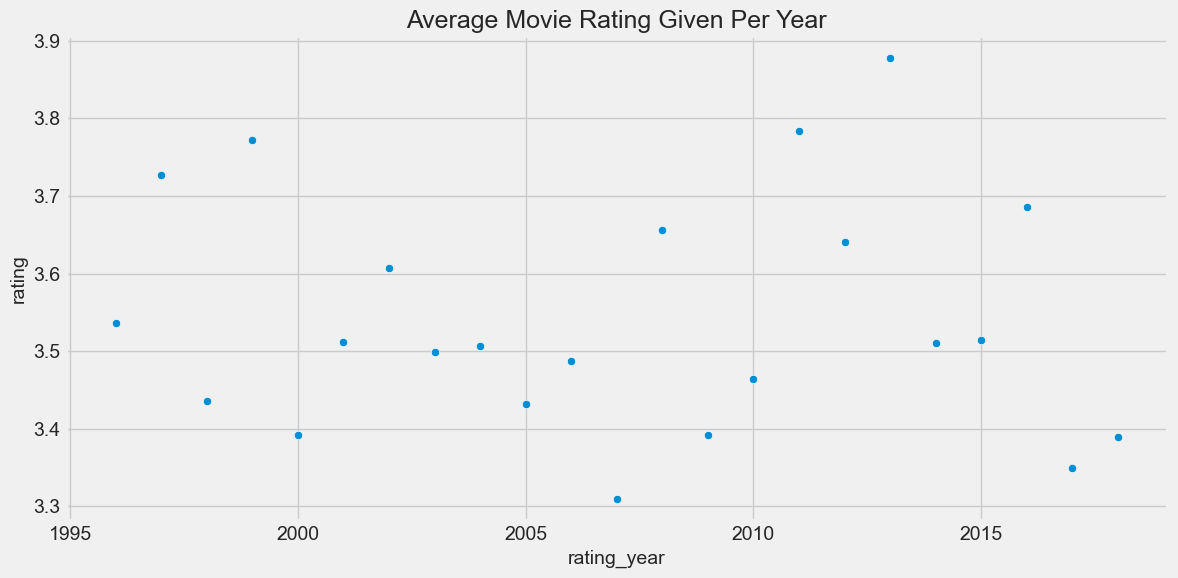

In [ ]:

yearly_avg_rating = master_df.groupby('rating_year')['rating'].mean()

yearly_avg_plotter = GraphPlotter(yearly_avg_rating.reset_index())
yearly_avg_plotter.plot_scatterplot(
    x_col='rating_year',
    y_col='rating',
    title='Average Movie Rating Given Per Year',
    figsize=(12, 6)
)



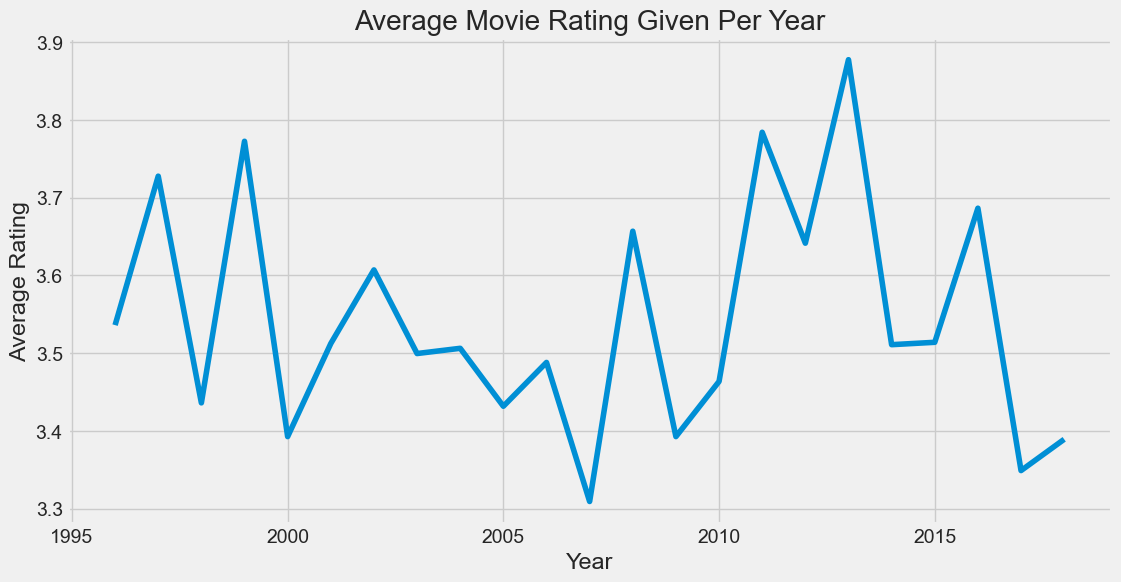

In [105]:
plt.figure(figsize=(12, 6))
yearly_avg_rating.plot(kind='line')
plt.title('Average Movie Rating Given Per Year')
plt.ylabel('Average Rating')
plt.xlabel('Year')
plt.show()

In [108]:
user_stats = master_df.groupby('userId').agg(
    rating_count=('rating', 'count'),
    rating_avg=('rating', 'mean')
).reset_index()

# Filter for users who have rated a reasonable number of movies
min_ratings_threshold = user_stats['rating_count'].quantile(0.50)

print(f"Minimum rating count threshold for genres: {int(min_ratings_threshold)}")
user_stats_qualified = user_stats[user_stats['rating_count'] >= min_ratings_threshold]

print("Toughest Raters (Lowest Avg Rating):")
print(user_stats_qualified.sort_values('rating_avg', ascending=True).head())

print("\nEasiest Raters (Highest Avg Rating):")
print(user_stats_qualified.sort_values('rating_avg', ascending=False).head())

Minimum rating count threshold for genres: 70
Toughest Raters (Lowest Avg Rating):
     userId  rating_count  rating_avg
138     139           194    2.144330
152     153           179    2.217877
566     567           385    2.245455
297     298           939    2.363685
516     517           400    2.386250

Easiest Raters (Highest Avg Rating):
     userId  rating_count  rating_avg
522     523            75    4.693333
170     171            82    4.634146
451     452           202    4.556931
42       43           114    4.552632
121     122           292    4.546233


Most Common User-Generated Tags:
tag
In Netflix queue      131
atmospheric            36
thought-provoking      24
superhero              24
surreal                23
funny                  23
Disney                 23
religion               22
quirky                 21
sci-fi                 21
dark comedy            21
psychology             21
suspense               20
crime                  19
visually appealing     19
Name: count, dtype: int64


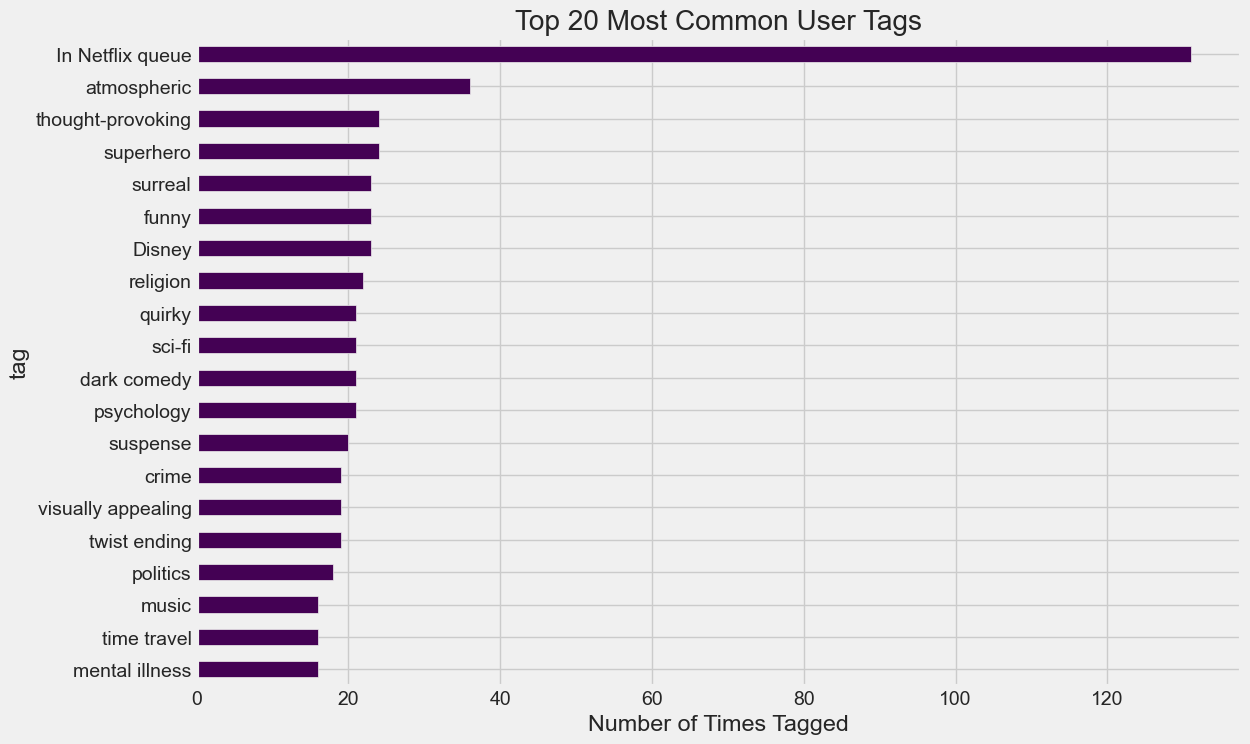

In [110]:
tag_counts = tags['tag'].value_counts()

print("Most Common User-Generated Tags:")
print(tag_counts.head(15))

plt.figure(figsize=(12, 8))
tag_counts.head(20).plot(kind='barh', colormap='viridis')
plt.gca().invert_yaxis()
plt.title('Top 20 Most Common User Tags')
plt.xlabel('Number of Times Tagged')
plt.show()

In [111]:
pulp_fiction_movieId = movies[movies['title'] == 'Pulp Fiction (1994)']['movieId'].iloc[0]
pulp_fiction_tags = tags[tags['movieId'] == pulp_fiction_movieId]
print("\nTags for Pulp Fiction:")
print(pulp_fiction_tags['tag'].value_counts())


Tags for Pulp Fiction:
tag
good dialogue       2
great soundtrack    2
non-linear          2
cult film           2
drugs               2
                   ..
unusual             1
very funny          1
violence            1
violent             1
witty               1
Name: count, Length: 173, dtype: int64


In [186]:
# Extracting year of release from the title
master_df['year'] = master_df['title'].str.extract(r'\((\d{4})\)')

In [187]:
master_df.head()

,userId,movieId,rating,timestamp,title,genres,rating_datetime,year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2000-07-30 18:45:03,1995
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,2000-07-30 18:20:47,1995
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,2000-07-30 18:37:04,1995
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2000-07-30 19:03:35,1995
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2000-07-30 18:48:51,1995


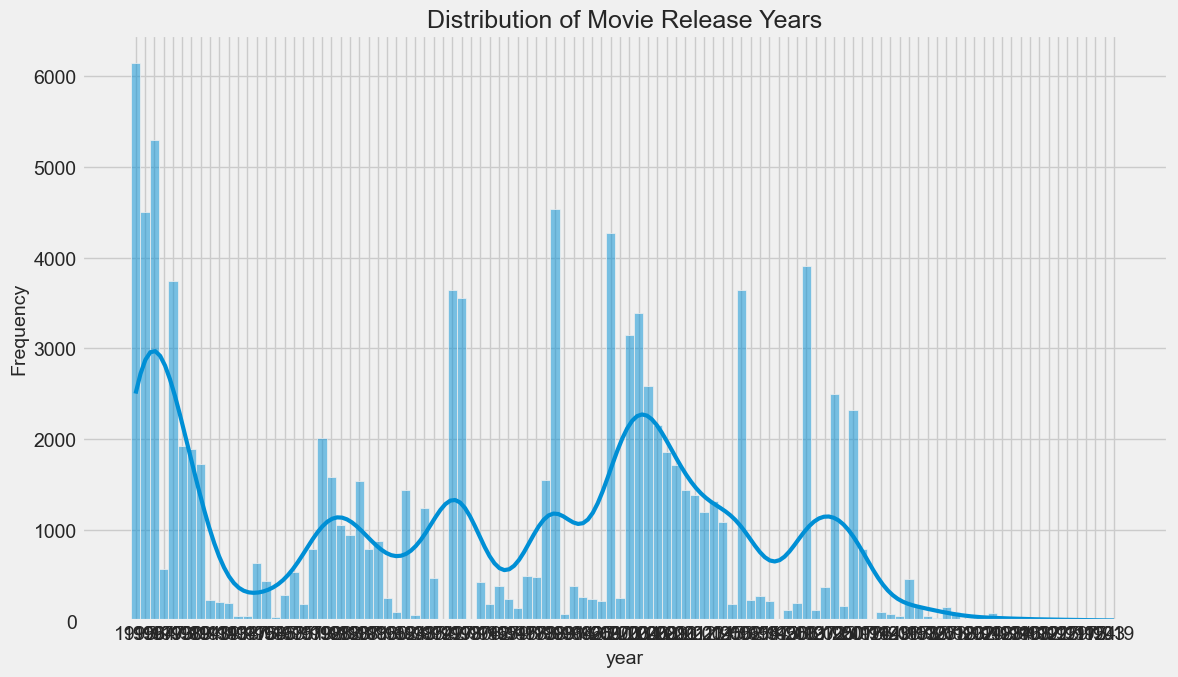

In [118]:
# Initialize plotter with the new year column
movies_plotter = GraphPlotter(master_df.dropna(subset=['year']))
movies_plotter.plot_histogram(col='year', bins=1, title='Distribution of Movie Release Years')

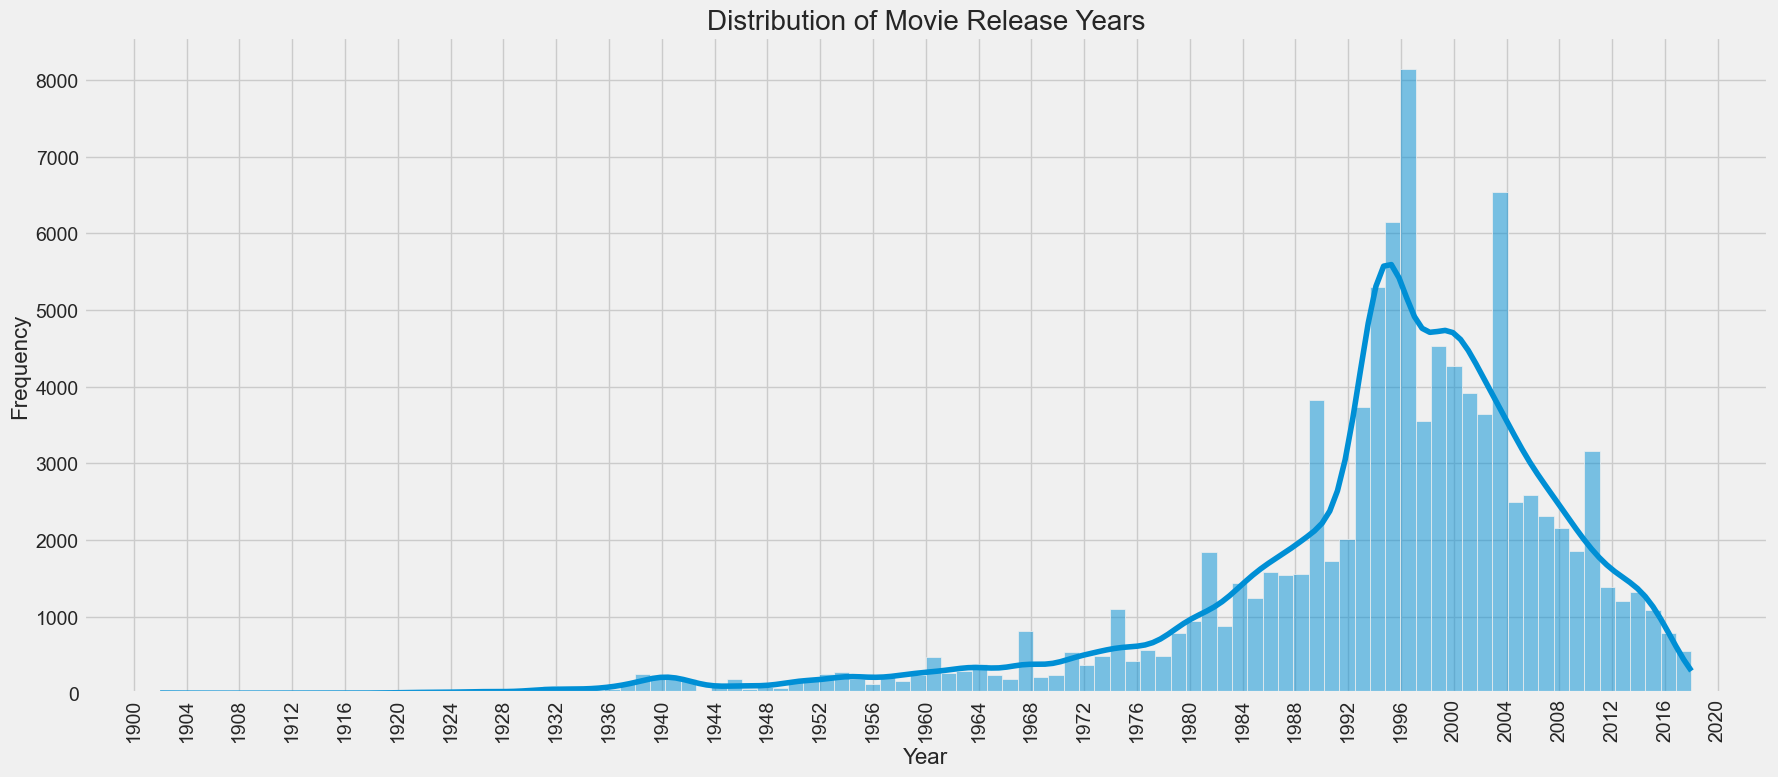

In [121]:
# Drop rows where year couldn't be extracted and convert to numeric
movies_with_year = master_df.dropna(subset=['year']).copy()
movies_with_year['year'] = pd.to_numeric(movies_with_year['year'])


# Now, let's create the plot with more control
plt.figure(figsize=(18, 8)) # Use a wider figure
ax = sns.histplot(data=movies_with_year, x='year', bins=100, kde=True)
plt.xticks(rotation=90) 
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True, nbins=len(movies_with_year['year'].unique()) // 3))

plt.title('Distribution of Movie Release Years', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\pking\AppData\Local\Temp\ipykernel_17636\3134091686.py:182: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=self.df, x=x_col, y=y_col, hue=hue_col, palette='deep')


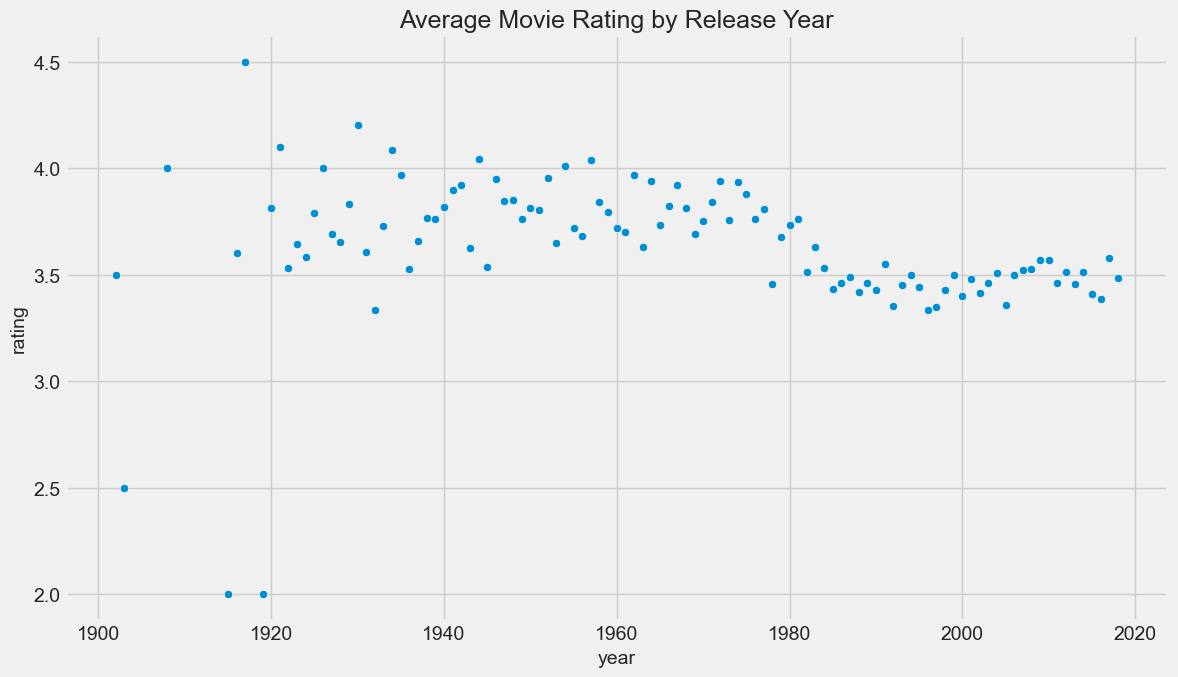

In [124]:
# Calculate the average rating for each year
yearly_movie_avg = movies_with_year.groupby('year')['rating'].mean().reset_index()
yearly_movie_avg_plotter = GraphPlotter(yearly_movie_avg)
yearly_movie_avg_plotter.plot_scatterplot(x_col = 'year', y_col='rating', title='Average Movie Rating by Release Year')

In [189]:
master_df.head()

,userId,movieId,rating,timestamp,title,genres,rating_datetime,year,rating_year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2000-07-30 18:45:03,1995,2000
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,2000-07-30 18:20:47,1995,2000
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,2000-07-30 18:37:04,1995,2000
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2000-07-30 19:03:35,1995,2000
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2000-07-30 18:48:51,1995,2000


In [129]:
# In your EDA notebook

# First, ensure the 'year' column exists and is numeric
movies_with_year = master_df.dropna(subset=['year']).copy()
movies_with_year['year'] = pd.to_numeric(movies_with_year['year'])

# Merge with ratings to get counts
yearly_data = pd.merge(master_df, movies_with_year[['movieId', 'year']], on='movieId')

# Now, create the aggregated stats per year
yearly_stats = yearly_data.groupby('year_x').agg(
    rating_avg=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

print("Yearly Statistics DataFrame:")
print(yearly_stats.head())

Yearly Statistics DataFrame:
  year_x  rating_avg  rating_count
0   1902    3.500000            25
1   1903    2.500000             4
2   1908    4.000000             1
3   1915    2.000000             1
4   1916    3.642857             7


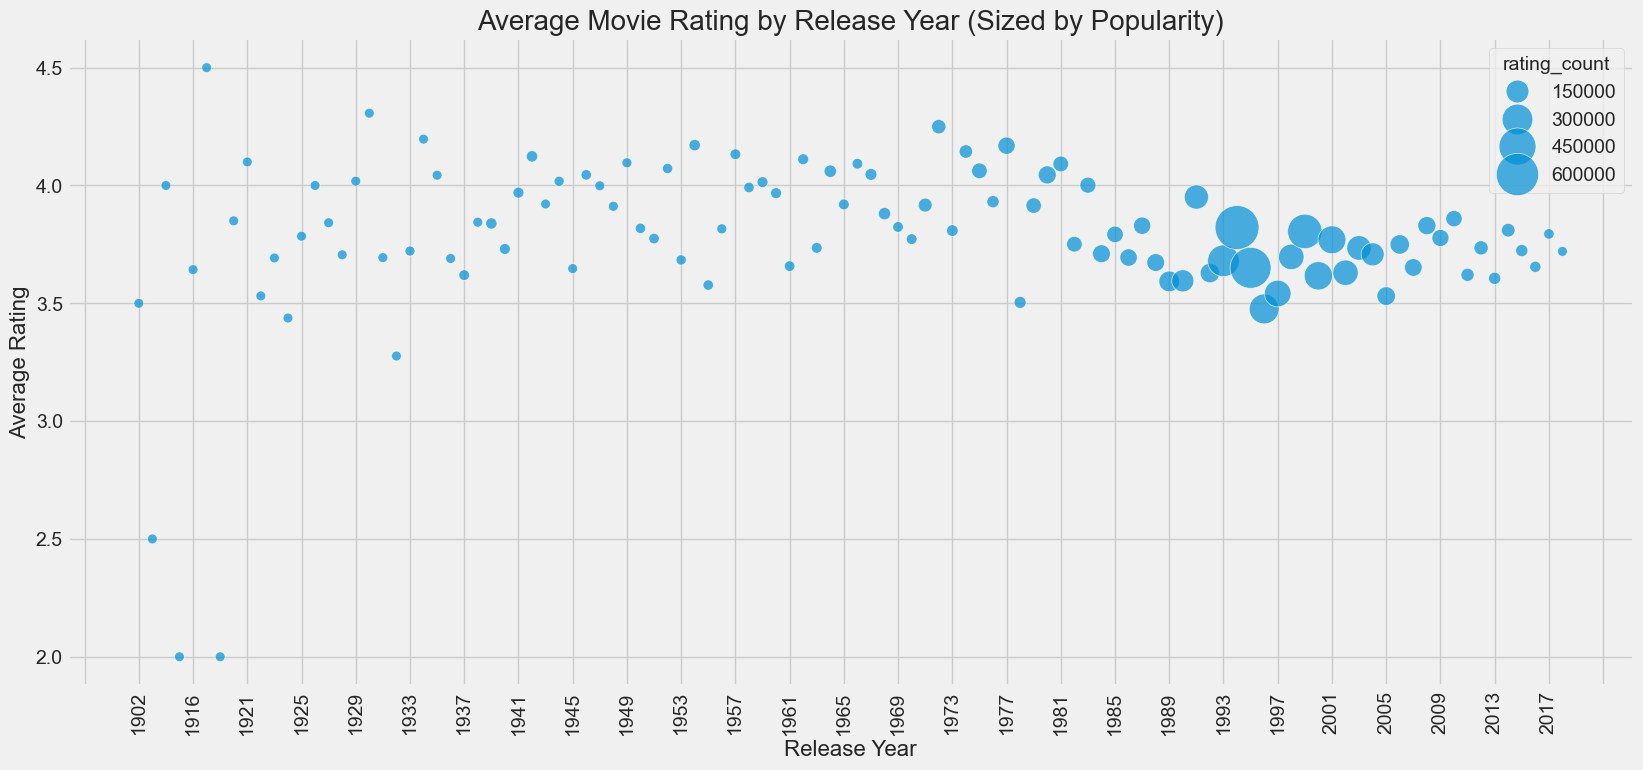

In [135]:
plt.figure(figsize=(18, 8))

# Use the 'size' parameter to encode rating_count
# Use 'sizes' to control the range of bubble sizes for better visibility
sns.scatterplot(
    data=yearly_stats,
    x='year_x',
    y='rating_avg',
    size='rating_count',  
    sizes=(50, 1000),   
    alpha=0.7,           
    legend='auto'
)
plt.xticks(rotation=90) 
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True, nbins=len(yearly_stats['year_x'].unique()) // 3))

plt.title('Average Movie Rating by Release Year (Sized by Popularity)', fontsize=20)
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Average Rating', fontsize=16)
plt.grid(True)
plt.show()

# Lets start with feature engineering

In [190]:
master_df = pd.merge(ratings, movies, on='movieId', how='inner')

In [191]:
print(gen_summary(master_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB
DataFrame Shape: (100836, 6)
Data Types:
userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
dtype: object
Missing Values:
userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64
Statistical Summary:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.50155

In [192]:
# Convert timestamp to a readable datetime format for later use
master_df['rating_datetime'] = pd.to_datetime(master_df['timestamp'], unit='s')
master_df.head()

,userId,movieId,rating,timestamp,title,genres,rating_datetime
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2000-07-30 18:45:03
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,2000-07-30 18:20:47
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,2000-07-30 18:37:04
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2000-07-30 19:03:35
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2000-07-30 18:48:51


In [146]:
! pip install cinemagoer

  Using cached sqlalchemy-2.0.41-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
  Using cached greenlet-3.2.3-cp313-cp313-win_amd64.whl.metadata (4.2 kB)
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------- ----------------------------- 1.0/4.0 MB 5.7 MB/s eta 0:00:01
   ------------- -------------------------- 1.3/4.0 MB 5.4 MB/s eta 0:00:01
   ------------------ --------------------- 1.8/4.0 MB 3.4 MB/s eta 0:00:01
   -------------------- ------------------- 2.1/4.0 MB 2.5 MB/s eta 0:00:01
   ----------------------- ---------------- 2.4/4.0 MB 2.3 MB/s eta 0:00:01
   -------------------------- ------------- 2.6/4.0 MB 2.1 MB/s eta 0:00:01
   -------------------------- ------------- 2.6/4.0 MB 2.1 MB/s eta 0:00:01
   ---------------------------- ----------- 2.9/4.0 MB 1.9 MB/s eta 0:00:01
   ------------------------------- -------- 3.1/4.0 MB 1.7 MB/s eta 0:00:01
   --------------------------------- ------ 3.4/4.0 MB 1.6 MB/s eta 0:00:01
   -----------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [150]:
from imdb import Cinemagoer

In [165]:
master_df[master_df['release_year'] == 0]

,userId,movieId,rating,timestamp,title,genres,rating_datetime,release_year
9147,62,176601,5.0,1525795252,Black Mirror,(no genres listed),2018-05-08 16:00:52,0
16886,105,147250,5.0,1526207354,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),2018-05-13 10:29:14,0
16913,105,171749,5.0,1526207365,Death Note: Desu nôto (2006–2007),(no genres listed),2018-05-13 10:29:25,0
17879,111,171631,1.0,1517440909,Maria Bamford: Old Baby,(no genres listed),2018-01-31 23:21:49,0
17881,111,171891,3.5,1517440199,Generation Iron 2,(no genres listed),2018-01-31 23:09:59,0
30039,209,140956,3.5,1524522239,Ready Player One,Action|Sci-Fi|Thriller,2018-04-23 22:23:59,0
30090,210,40697,4.0,1527266191,Babylon 5,Sci-Fi,2018-05-25 16:36:31,0
46593,305,140956,4.5,1533043577,Ready Player One,Action|Sci-Fi|Thriller,2018-07-31 13:26:17,0
46711,306,149334,3.0,1518380372,Nocturnal Animals,Drama|Thriller,2018-02-11 20:19:32,0
49851,318,171495,5.0,1516826406,Cosmos,(no genres listed),2018-01-24 20:40:06,0


In [155]:
ia = Cinemagoer()

missing_year_ids = master_df[master_df['release_year'] == 0]['movieId'].unique()
print(f"Found {len(missing_year_ids)} unique movies with missing release years that need to be fixed.")

Found 13 unique movies with missing release years that need to be fixed.


In [156]:
# Filter the links dataframe to only include the movies we need to fix
movies_to_fix = links[links['movieId'].isin(missing_year_ids)]

print(f"Found {len(movies_to_fix)} corresponding IMDb IDs.")
movies_to_fix.head()

Found 13 corresponding IMDb IDs.


,movieId,imdbId,tmdbId
6059,40697,105946,NaN
9031,140956,1677720,333339.0
9091,143410,4034452,316042.0
9138,147250,229922,127605.0
9179,149334,4550098,340666.0


In [159]:
import time

# Create an empty dictionary to store our results: {movieId: year}
year_mapping = {}

print("--- Starting to fetch data from IMDb ---")
print("This may take several minutes depending on the number of movies...")

for index, row in movies_to_fix.iterrows():
    movieId = row['movieId']
    imdbId = str(int(row['imdbId']))
    
    try:
        # Fetch the movie data using its IMDb ID
        movie = ia.get_movie(imdbId)
        
        # Extract the year
        if 'year' in movie:
            year = movie['year']
            year_mapping[movieId] = year
            print(f"  -> Success for movieId {movieId}: Found year {year}")
        else:
            print(f"  -> Warning for movieId {movieId}: Movie found, but no year data was available.")
            
        # Be a good citizen and pause briefly between requests to avoid getting blocked
        time.sleep(0.5)

    except Exception as e:
        print(f"  -> ERROR for movieId {movieId} (imdbId: {imdbId}): {e}")
        continue

print("\n--- IMDb Data Fetching Complete ---")
print(f"Successfully found years for {len(year_mapping)} movies.")

--- Starting to fetch data from IMDb ---
This may take several minutes depending on the number of movies...
  -> Success for movieId 40697.0: Found year 1993
  -> Success for movieId 140956.0: Found year 2018
  -> Success for movieId 143410.0: Found year 2015
  -> Success for movieId 147250.0: Found year 1980
  -> Success for movieId 149334.0: Found year 2016
  -> Success for movieId 156605.0: Found year 2016
  -> Success for movieId 162414.0: Found year 2016
  -> Success for movieId 167570.0: Found year 2016
  -> Success for movieId 171495.0: Found year 1980
  -> Success for movieId 171631.0: Found year 2017
  -> Success for movieId 171749.0: Found year 2006
  -> Success for movieId 171891.0: Found year 2017
  -> Success for movieId 176601.0: Found year 2011

--- IMDb Data Fetching Complete ---
Successfully found years for 13 movies.


In [194]:
year_mapping

{np.float64(40697.0): 1993,
 np.float64(140956.0): 2018,
 np.float64(143410.0): 2015,
 np.float64(147250.0): 1980,
 np.float64(149334.0): 2016,
 np.float64(156605.0): 2016,
 np.float64(162414.0): 2016,
 np.float64(167570.0): 2016,
 np.float64(171495.0): 1980,
 np.float64(171631.0): 2017,
 np.float64(171749.0): 2006,
 np.float64(171891.0): 2017,
 np.float64(176601.0): 2011}

In [195]:
#lookup table
corrections_df = pd.DataFrame(list(year_mapping.items()), columns=['movieId', 'correct_year'])
print(f"Created a lookup table with {len(corrections_df)} corrected years.")

#join
master_df = pd.merge(master_df, corrections_df, on='movieId', how='left')


#conditon to replace
import numpy as np
master_df['release_year'] = np.where(
    master_df['correct_year'].notnull(), # Condition: If a correct_year exists...
    master_df['correct_year'],          # ...use the correct_year.
    master_df['release_year']           # ...otherwise, keep the old release_year.
)


# Clean up the temporary column 
master_df.drop(columns=['correct_year'], inplace=True)
print("Patching with API data complete.")

# convert to integer
master_df['release_year'] = master_df['release_year'].astype(int)
print("Fallback applied and column converted to integer.")

print("\n--- Verification for 'Babylon 5' ---")
# This will now show the correct year: 1993
print(master_df[master_df['movieId'] == 176601][['title', 'release_year']].head(1))


Created a lookup table with 13 corrected years.
Patching with API data complete.
Fallback applied and column converted to integer.

--- Verification for 'Babylon 5' ---
             title  release_year
9147  Black Mirror          2011


In [200]:
# Adding rating year
master_df['rating_year'] = master_df['rating_datetime'].dt.year
# Adding genrelist
master_df['genres_list'] = master_df['genres'].str.split('|')

In [201]:
master_df.head()

,userId,movieId,rating,timestamp,title,genres,rating_datetime,release_year,rating_year,genres_list
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2000-07-30 18:45:03,1995,2000,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,2000-07-30 18:20:47,1995,2000,"[Comedy, Romance]"
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,2000-07-30 18:37:04,1995,2000,"[Action, Crime, Thriller]"
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2000-07-30 19:03:35,1995,2000,"[Mystery, Thriller]"
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2000-07-30 18:48:51,1995,2000,"[Crime, Mystery, Thriller]"


In [202]:
master_df[master_df['genres'] == '(no genres listed)']['title'].value_counts()

title
Pirates of the Caribbean: Dead Men Tell No Tales (2017)                               7
Green Room (2015)                                                                     3
Whiplash (2013)                                                                       2
The Godfather Trilogy: 1972-1990 (1992)                                               2
Cosmos                                                                                2
The Brand New Testament (2015)                                                        2
Grease Live (2016)                                                                    2
La cravate (1957)                                                                     1
The Adventures of Sherlock Holmes and Doctor Watson                                   1
The Putin Interviews (2017)                                                           1
Trevor Noah: African American (2013)                                                  1
The Adventures of Sherlock

In [203]:
master_df[master_df['title'] == 'Pirates of the Caribbean: Dead Men Tell No Tales (2017)']

,userId,movieId,rating,timestamp,title,genres,rating_datetime,release_year,rating_year,genres_list
3624,21,122896,4.0,1452052163,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2016-01-06 03:49:23,2017,2016,[(no genres listed)]
9101,62,122896,3.5,1523047955,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2018-04-06 20:52:35,2017,2018,[(no genres listed)]
17780,111,122896,3.5,1516152736,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2018-01-17 01:32:16,2017,2018,[(no genres listed)]
30471,212,122896,3.5,1528479617,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2018-06-08 17:40:17,2017,2018,[(no genres listed)]
36355,248,122896,4.0,1534592058,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2018-08-18 11:34:18,2017,2018,[(no genres listed)]
37495,252,122896,3.0,1498284070,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2017-06-24 06:01:10,2017,2017,[(no genres listed)]
90221,586,122896,5.0,1529899587,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2018-06-25 04:06:27,2017,2018,[(no genres listed)]


In [204]:
# Get the unique movieIds that have the specific "(no genres listed)" value
movies_to_fix_ids = master_df[master_df['genres'] == '(no genres listed)']['movieId'].unique()
print(f"Found {len(movies_to_fix_ids)} unique movies with '(no genres listed)' that need fixing.")

# Get the corresponding imdbIds for these movies
movies_to_fix_df = links[links['movieId'].isin(movies_to_fix_ids)]
print(f"Found {len(movies_to_fix_df)} IMDb IDs for these movies.")

Found 34 unique movies with '(no genres listed)' that need fixing.
Found 34 IMDb IDs for these movies.


In [ ]:
# Create an empty dictionary to store our results: {movieId: ['Genre1', 'Genre2']}
genre_mapping = {}

print("\n--- Starting to fetch genre data from IMDb ---")

for index, row in movies_to_fix_df.iterrows():
    movieId = row['movieId']
    imdbId = str(int(row['imdbId']))
    
    try:
        # Fetch the movie data using its IMDb ID
        movie = ia.get_movie(imdbId)
        
        # Extract the genre list
        if 'genres' in movie:
            genres_list = movie['genres'] # This is already a Python list
            genre_mapping[movieId] = genres_list
            print(f"  -> Success for movieId {movieId}: Found genres {genres_list}")
        else:
            print(f"  -> Warning for movieId {movieId}: Movie found, but no genre data was available.")
            
        time.sleep(0.5)

    except Exception as e:
        print(f"  -> ERROR for movieId {movieId} (imdbId: {imdbId}): {e}")
        continue

print("\n--- IMDb Data Fetching Complete ---")
print(f"Successfully found genres for {len(genre_mapping)} movies.")


--- Starting to fetch genre data from IMDb ---
  -> Warning for movieId 114335.0: Movie found, but no genre data was available.
  -> Warning for movieId 122888.0: Movie found, but no genre data was available.
  -> Warning for movieId 122896.0: Movie found, but no genre data was available.
  -> Warning for movieId 129250.0: Movie found, but no genre data was available.
  -> Warning for movieId 132084.0: Movie found, but no genre data was available.
  -> Warning for movieId 134861.0: Movie found, but no genre data was available.
  -> Warning for movieId 141131.0: Movie found, but no genre data was available.
  -> Warning for movieId 141866.0: Movie found, but no genre data was available.
  -> Warning for movieId 142456.0: Movie found, but no genre data was available.
  -> Warning for movieId 143410.0: Movie found, but no genre data was available.
  -> Warning for movieId 147250.0: Movie found, but no genre data was available.
  -> Warning for movieId 149330.0: Movie found, but no genre 

In [208]:

master_df.to_csv('master_df.csv', index=False)